<a href="https://colab.research.google.com/github/Kaiking28/ECON3916-Statistical-Machine-Learning/blob/main/class3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_codes = ['GTM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}


In [15]:
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

df = df_raw.T

df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

df.rename(columns=indicators, level=1, inplace=True)

df_gtm = df.xs('GTM', axis=1, level=0).copy()

Fetching data...


In [16]:
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

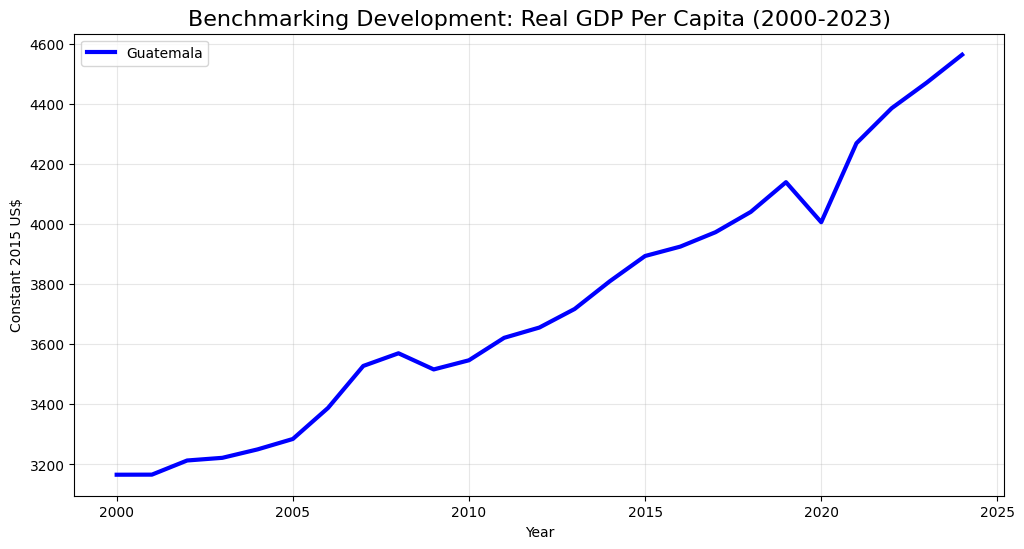

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

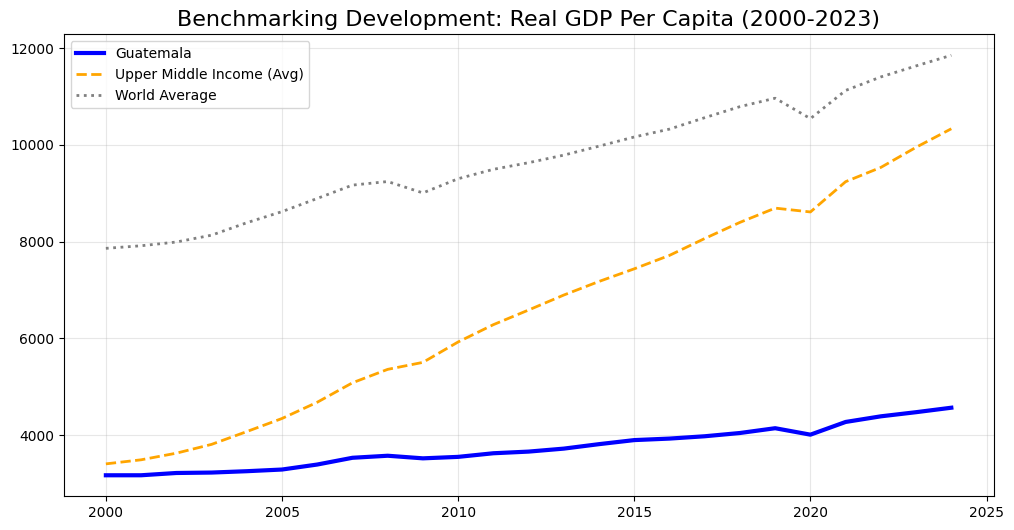

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

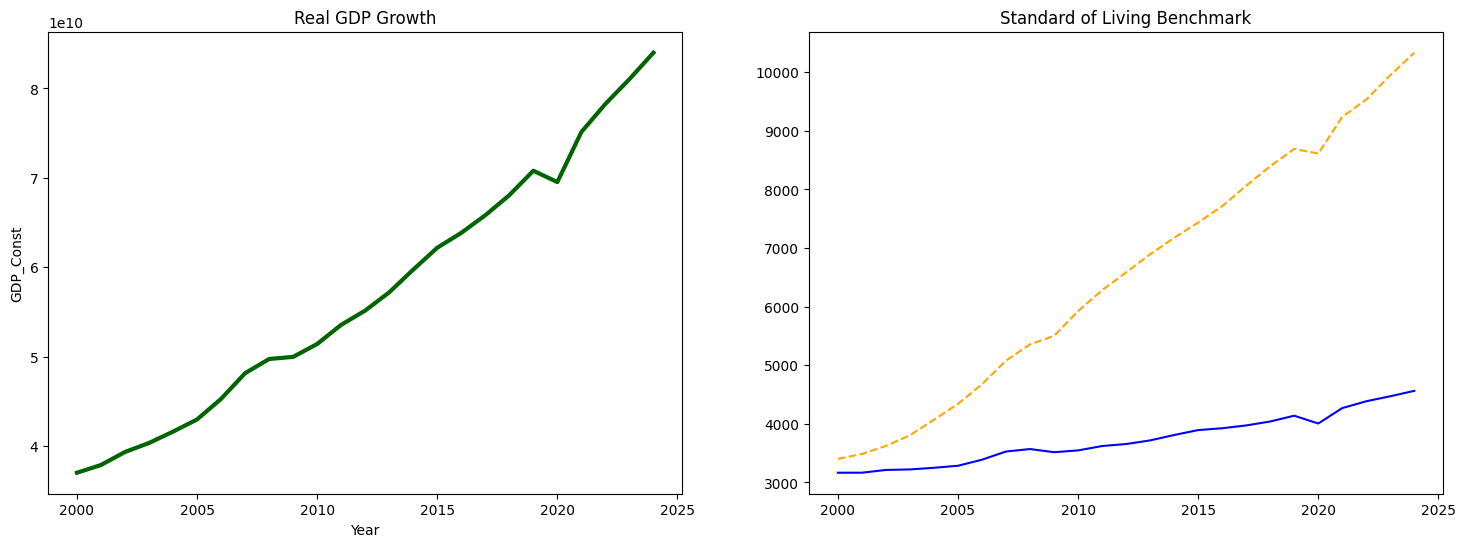

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

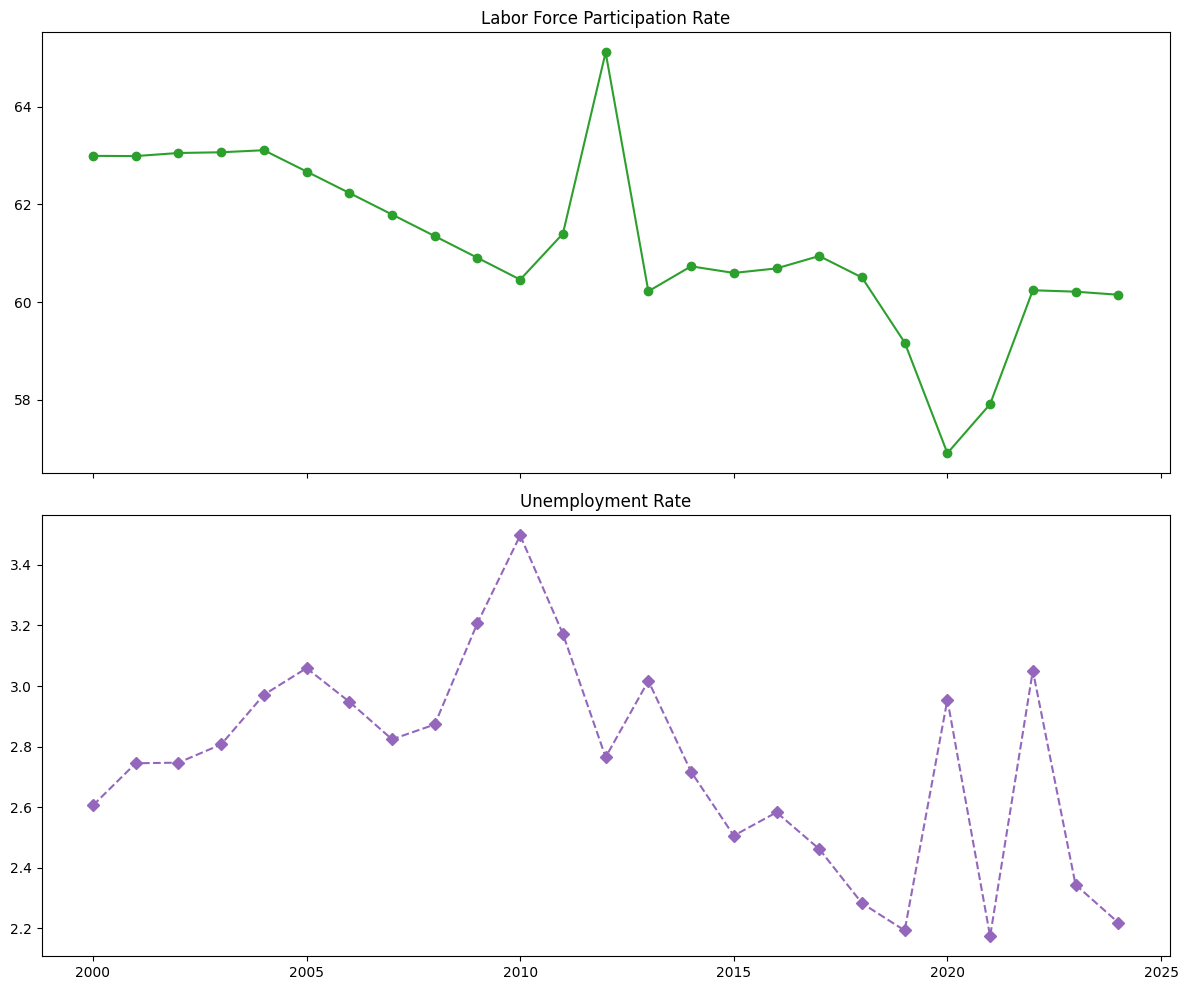

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

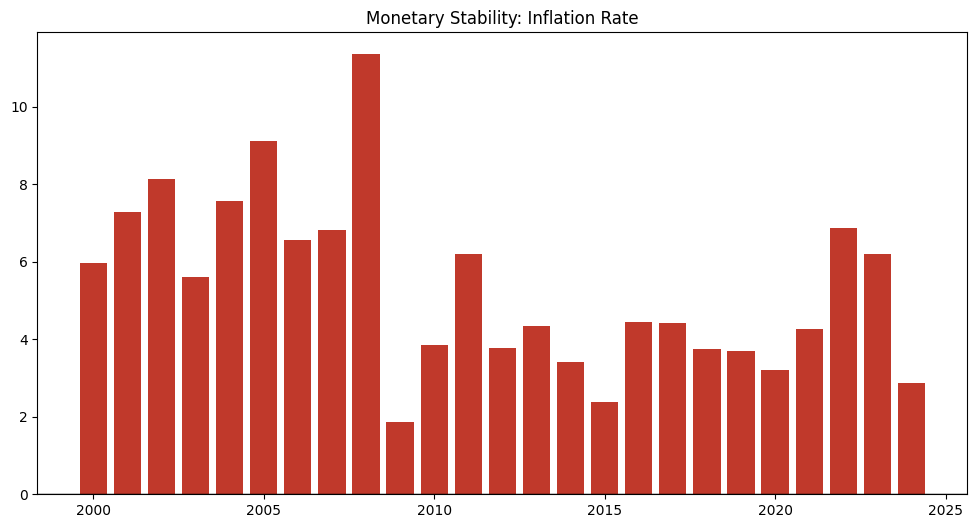

In [21]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

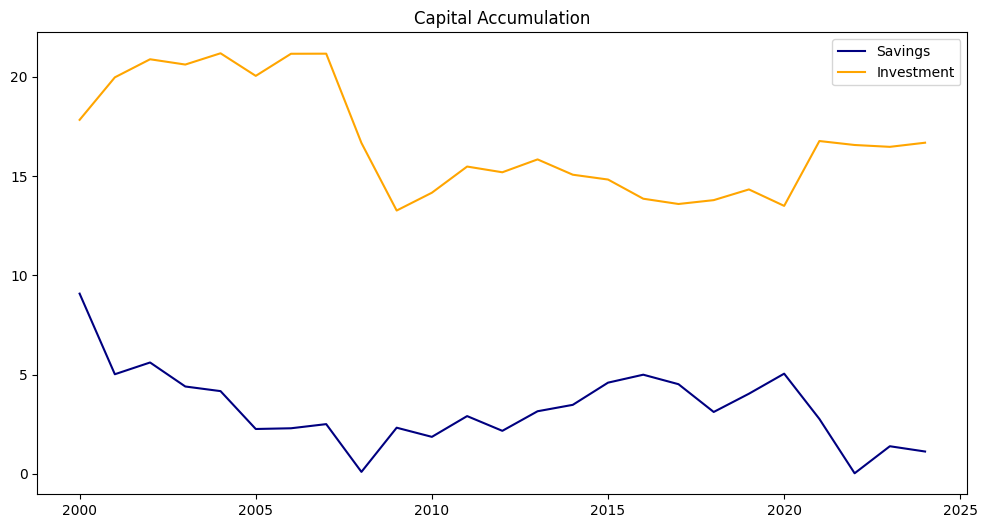

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

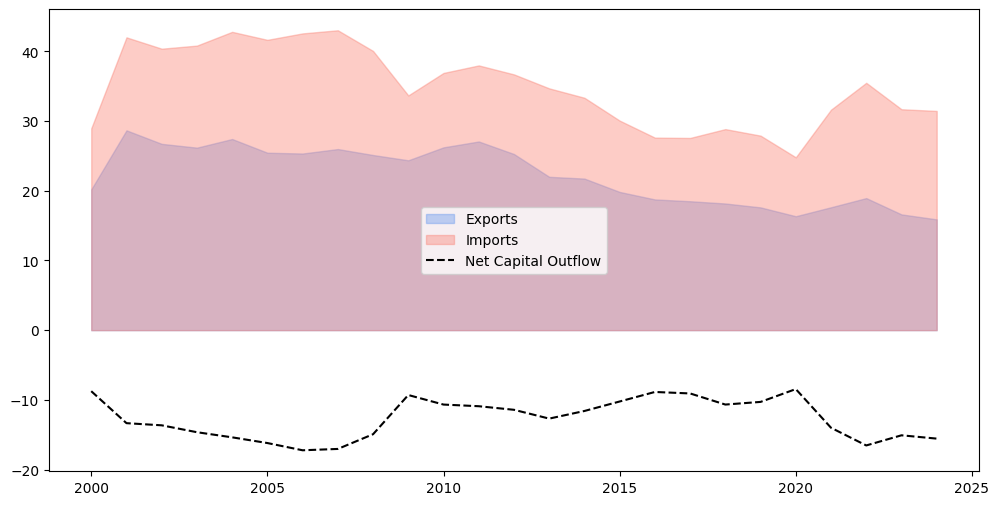

In [23]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

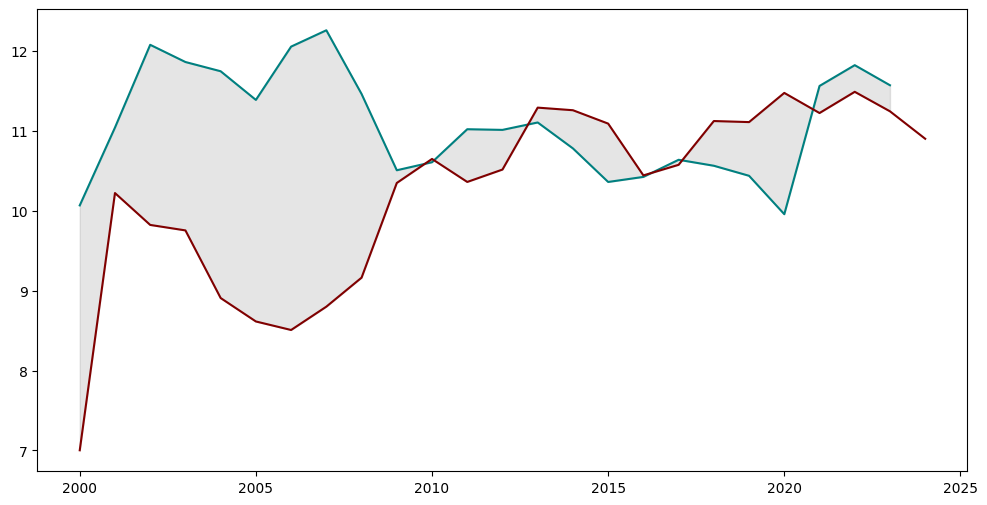

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

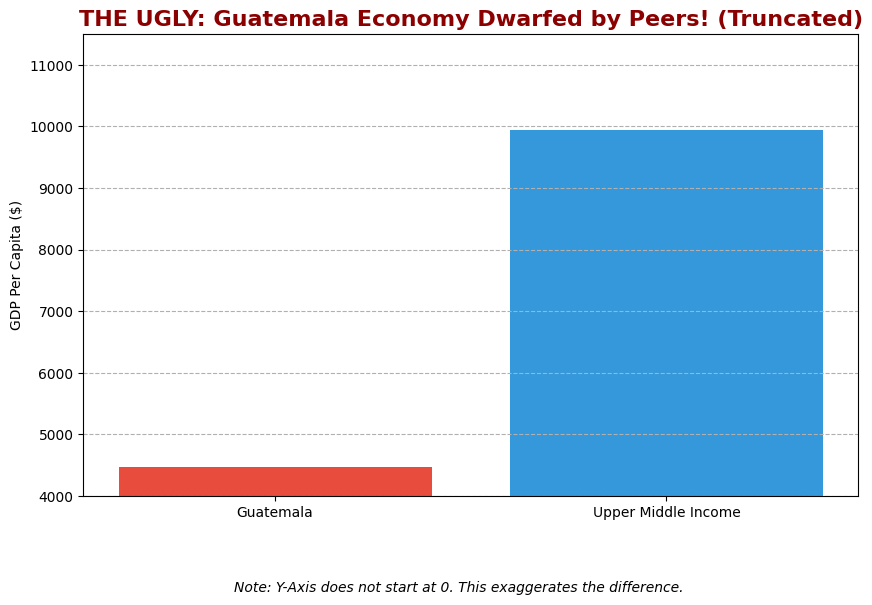

In [25]:

snapshot_year = 2023
gtm_val = df.loc[snapshot_year, ('GTM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])


plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

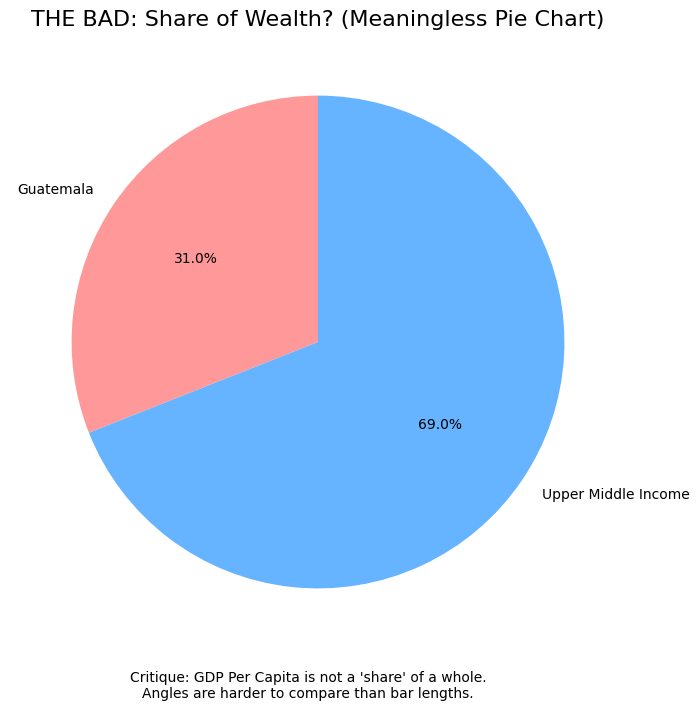

In [26]:
plt.figure(figsize=(8, 8))


plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

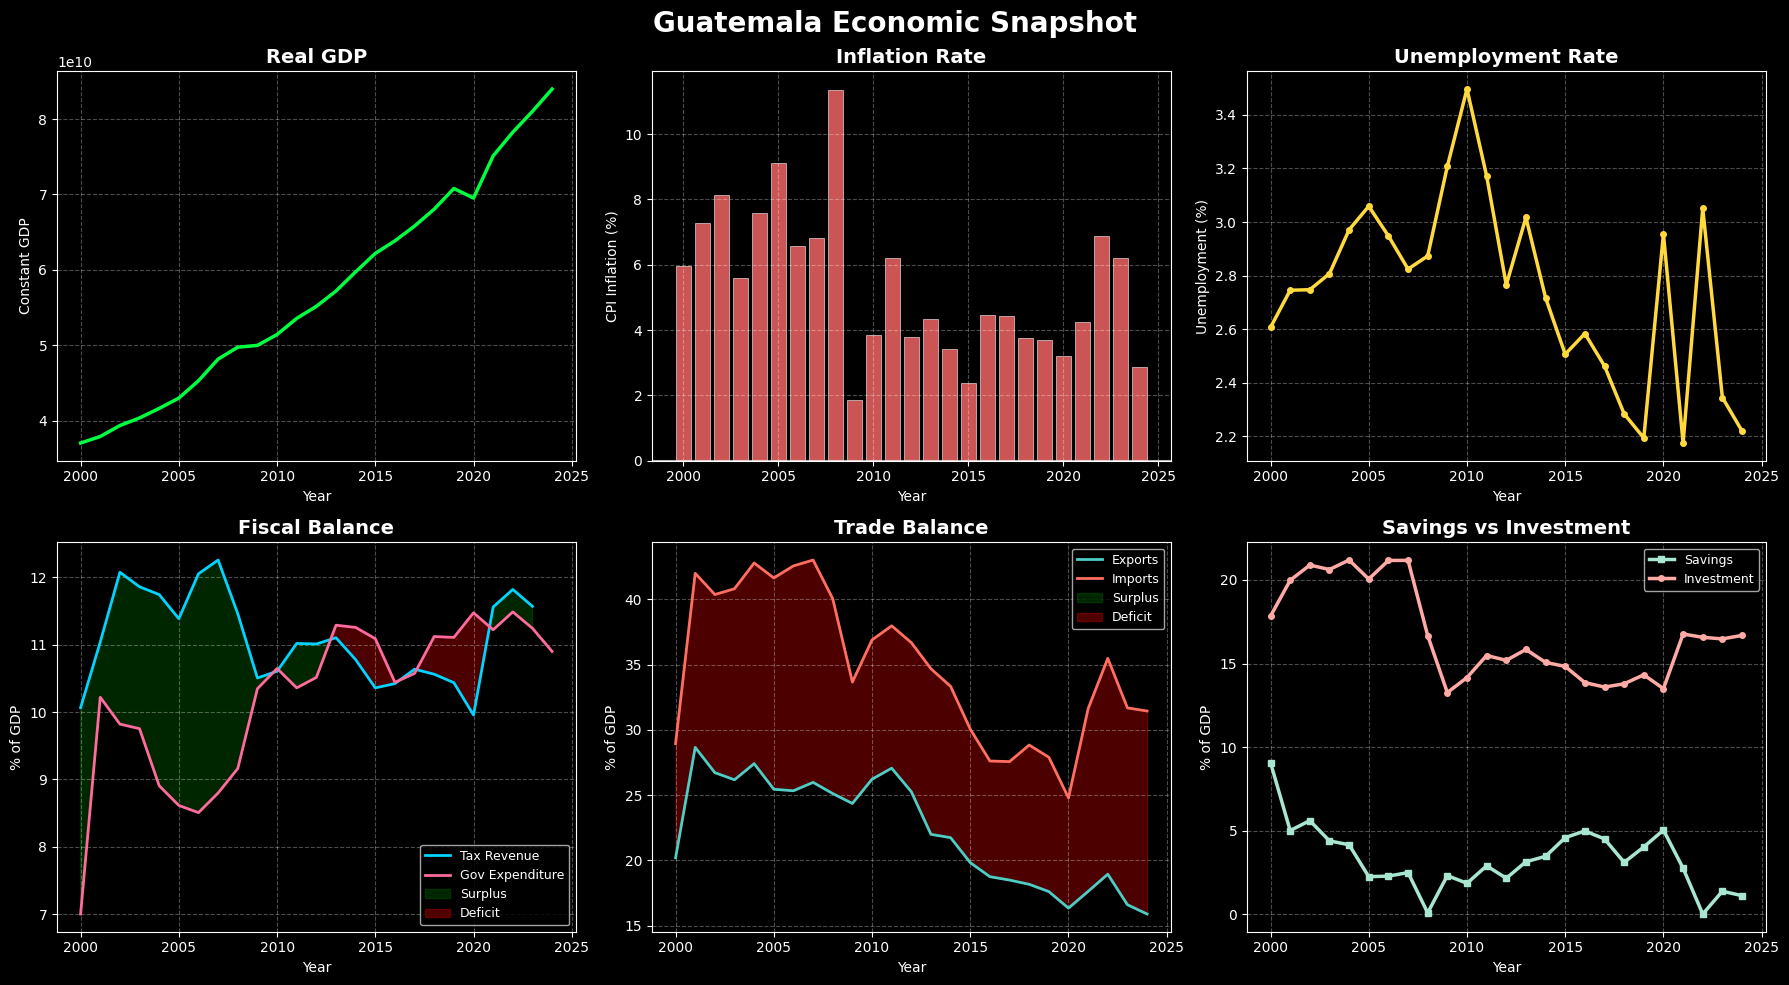

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the dark background style
plt.style.use('dark_background')

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Guatemala Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Assuming df_gtm has a datetime index or year column
# If you have a specific time column, replace df_gtm.index with df_gtm['your_time_column']

# 1. Top Left: Real GDP (Line chart)
axes[0, 0].plot(df_gtm.index, df_gtm['GDP_Const'], color='#00ff41', linewidth=2.5)
axes[0, 0].set_title('Real GDP', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Constant GDP')
axes[0, 0].grid(alpha=0.3, linestyle='--')
axes[0, 0].tick_params(labelsize=10)

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
axes[0, 1].bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#ff6b6b', alpha=0.8, edgecolor='white', linewidth=0.5)
axes[0, 1].axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('CPI Inflation (%)')
axes[0, 1].grid(alpha=0.3, linestyle='--')
axes[0, 1].tick_params(labelsize=10)

# 3. Top Right: Unemployment Rate (Line chart)
axes[0, 2].plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='#ffd93d', linewidth=2.5, marker='o', markersize=4)
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Unemployment (%)')
axes[0, 2].grid(alpha=0.3, linestyle='--')
axes[0, 2].tick_params(labelsize=10)

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axes[1, 0].plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Tax Revenue', color='#00d4ff', linewidth=2)
axes[1, 0].plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Gov Expenditure', color='#ff6b9d', linewidth=2)
axes[1, 0].fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                         where=(df_gtm['Tax_Rev_GDP'] >= df_gtm['Gov_Exp_GDP']),
                         color='green', alpha=0.3, interpolate=True, label='Surplus')
axes[1, 0].fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                         where=(df_gtm['Tax_Rev_GDP'] < df_gtm['Gov_Exp_GDP']),
                         color='red', alpha=0.3, interpolate=True, label='Deficit')
axes[1, 0].set_title('Fiscal Balance', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(alpha=0.3, linestyle='--')
axes[1, 0].tick_params(labelsize=10)

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
axes[1, 1].plot(df_gtm.index, df_gtm['Exports_GDP'], label='Exports', color='#4ecdc4', linewidth=2)
axes[1, 1].plot(df_gtm.index, df_gtm['Imports_GDP'], label='Imports', color='#ff6f61', linewidth=2)
axes[1, 1].fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                         where=(df_gtm['Exports_GDP'] >= df_gtm['Imports_GDP']),
                         color='green', alpha=0.3, interpolate=True, label='Surplus')
axes[1, 1].fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                         where=(df_gtm['Exports_GDP'] < df_gtm['Imports_GDP']),
                         color='red', alpha=0.3, interpolate=True, label='Deficit')
axes[1, 1].set_title('Trade Balance', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(alpha=0.3, linestyle='--')
axes[1, 1].tick_params(labelsize=10)

# 6. Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings',
                color='#a8e6cf', linewidth=2.5, marker='s', markersize=4)
axes[1, 2].plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment',
                color='#ffaaa5', linewidth=2.5, marker='o', markersize=4)
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=9)
axes[1, 2].grid(alpha=0.3, linestyle='--')
axes[1, 2].tick_params(labelsize=10)

# Apply tight layout to prevent overlap
plt.tight_layout()

# Display the dashboard
plt.show()